Programa para aproximar por el metodo de Spline Natural

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Retorna todos los coeficientes de los splines
def spline (x,y):
  n = len(x)

  # Diccionario para cada valor de 'y' y 'h'
  a = {k: v for k, v in enumerate(y)}
  h = {k: x[k+1]-x[k] for k in range(n-1)}

  #Construimos la matriz A
  A = [[1]+[0]*(n-1)]
  for i in range(1, n-1):
    row = [0]*n
    row[i-1] = h[i-1]
    row[i] = 2*(h[i-1]+h[i])
    row[i+1] = h[i]
    A.append(row)
  A.append([0]*(n-1)+[1])

  B = [0]
  for k in range(1,n-1):
    row = 3*(a[k+1]-a[k])/h[k]-3*(a[k]-a[k-1])/h[k-1]
    B.append(row)
  B.append(0)
  # valores de c0 c1 c3 c3 en diccionario
  c = dict(zip(range(n), np.linalg.solve(A,B)))

  b = {}
  d = {}
  for k in range(n-1):
    b[k] = (1/h[k]) * (a[k+1]-a[k]) - (h[k]/3) * (2*c[k]+c[k+1])
    d[k] = (c[k+1]-c[k])/(3*h[k])

  s ={}
  for k in range(n-1):
    eq = f'{a[k]}{b[k]:+}*(x-{x[k]}){c[k]:+}*(x-{x[k]})**2{d[k]:+}*(x-{x[k]})**3'
    s[k] ={'eq': eq, 'dominio': [x[k], x[k+1]]}

  return s



Ingresamos los datos de $x$ y $y$ e invocamos a la funcion *spline*

Retorna los polinomios en forma de diciconario:

In [3]:
x = [0, 3, 5, 8, 13]
y = [0, 225, 383, 623, 993]
eqs = spline(x,y)
print(eqs)


{0: {'eq': '0+73.88796680497926*(x-0)-2.9605947323337506e-16*(x-0)**2+0.12355924389119413*(x-0)**3', 'dominio': [0, 3]}, 1: {'eq': '225+77.2240663900415*(x-3)+1.112033195020747*(x-3)**2-0.11203319502074689*(x-3)**3', 'dominio': [3, 5]}, 2: {'eq': '383+80.32780082987551*(x-5)+0.4398340248962655*(x-5)**2-0.1830336560627017*(x-5)**3', 'dominio': [5, 8]}, 3: {'eq': '623+78.02489626556016*(x-8)-1.2074688796680497*(x-8)**2+0.08049792531120331*(x-8)**3', 'dominio': [8, 13]}}


graficamos los los polinomios continuas

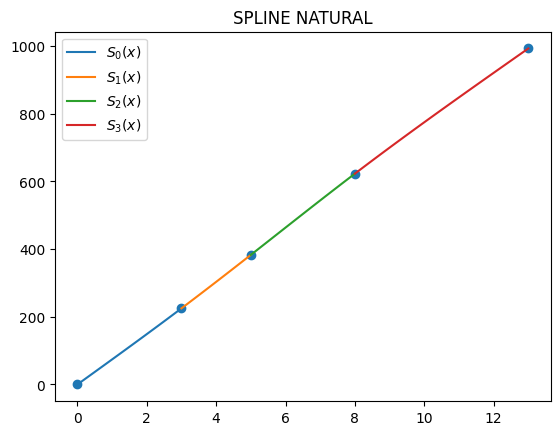

In [4]:
for key, value in eqs.items():
  def p(x):
    return eval(value['eq'])
  t = np.linspace(*value['dominio'], 100)
  plt.plot(t, p(t), label=f"$S_{key}(x)$")
plt.title('SPLINE NATURAL')
plt.scatter(x,y)
plt.legend()